# **Loading Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Accessing Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Reading Csv file into a dataframe
df = pd.read_csv('/content/drive/MyDrive/mhcld-puf-2020-csv.csv')


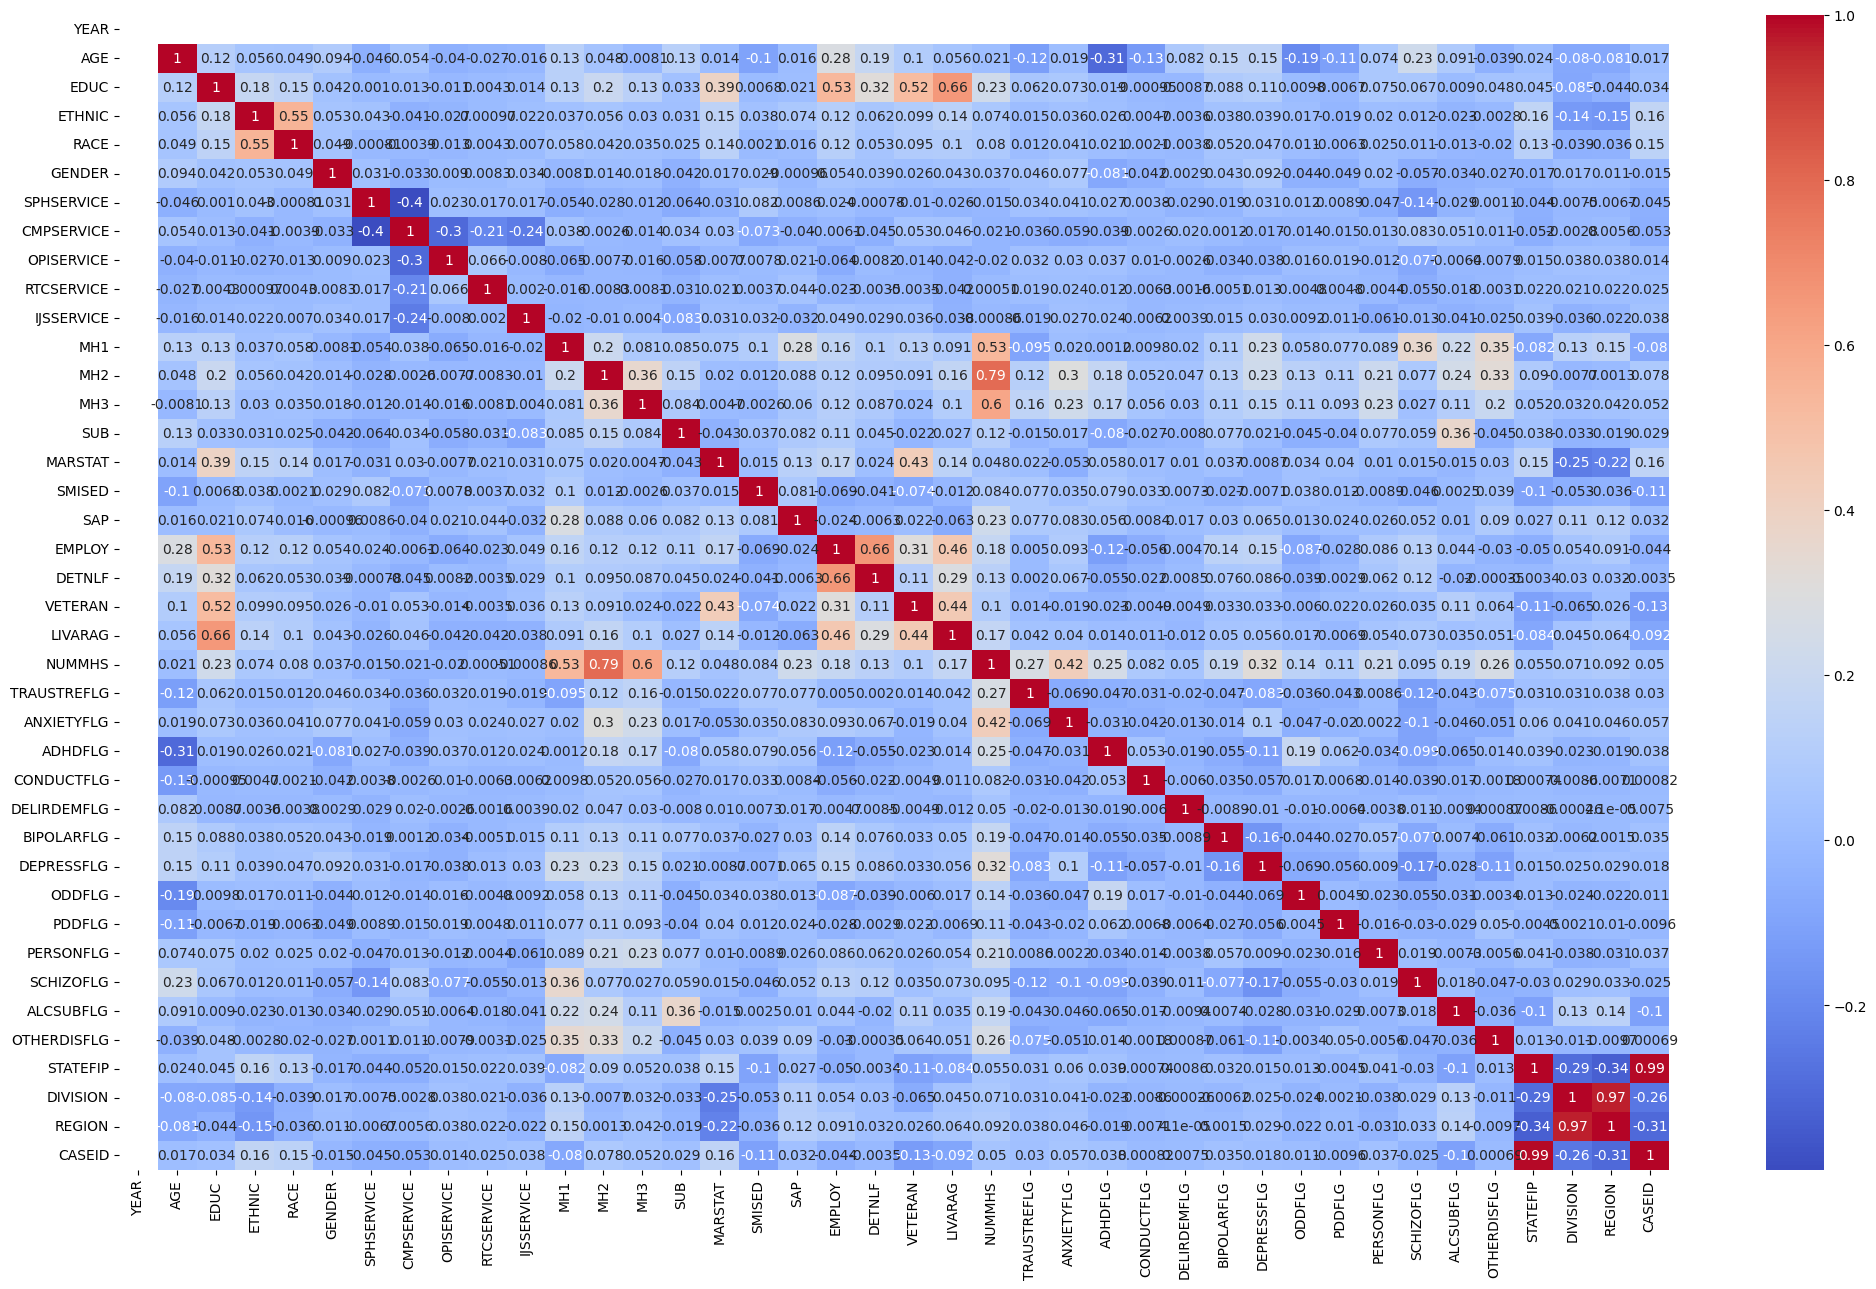

In [4]:
#Heatmap for Correlation betwen the features 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Calculate correlation matrix
corr = df.corr()

# Create heatmap
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Cleaning the Data and removing un-wanted columns

In [ ]:
#Drop Column names 
df = df.drop(['YEAR', 'ALCSUBFLG', 'SAP', 'SUB', 'RTCSERVICE', 'ODDFLG', 'CONDUCTFLG', 'ADHDFLG', 'OPISERVICE', 'PERSONFLG', 'DIVISION', 'REGION', 'CASEID' ,'IJSSERVICE', 'SPHSERVICE'], axis = 1) 

In [ ]:
#Label Various Illness
diagnosis = {1: "Trauma & Stress", 2: "Anxiety Disorder", 3: "ADHD", 4: "Conduct Disorder", 5: "Dementia", 6: "Bipolar", 7: "Depression", 8: "Oppositional Defiant Disorders", 
   9: "Pervasive Developmental Disorder", 10: "Personality Disorder", 11: "Schizophrenia", 12:"Alcohol", 13:"Other Disorders", -9:"Missing"}
df['MH1'] = df['MH1'].replace(diagnosis)
df['MH2'] = df['MH2'].replace(diagnosis)
df['MH3'] = df['MH3'].replace(diagnosis)

#Labeling the RACE
RACE = {1:"American Indian/Alaska Native", 2:"Asian", 3:"Black or African American", 4:"Native Hawaiian", 5:"White", 6:"Some other Race", -9:"Missings/ Unkown"}
df['RACE'] = df['RACE'].replace(RACE)

#Labeling The GENDER
Gender = {1:'Male', 2:'Female', -9: "Missing/ Unkown"}
df['GENDER'] = df['GENDER'].replace(Gender)

#LAbel Age
age_yrs = {1: "0-11 yrs", 2: "12-17 yrs", 3: "12-17 yrs", 4:"18-24 yrs", 5:"18-24 yrs", 6:"25-64 yrs", 7:"25-64 yrs", 8:"25-64 yrs", 9:"25-64 yrs", 10:"25-64 yrs", 11:"25-64 yrs",
       12:"25-64 yrs", 13: "25-64 yrs", 14:"65+ yrs", -9: "Missing" }
df['AGE'] = df['AGE'].replace(age_yrs)


#Label The state
state = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Conneticut', 10: 'Delaware', 11: 'District of Columbia',
         12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: ' Kentucky', 22: 'Louisiana', 25:'Massachusetts',
         26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York',
         37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota',
         47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 55: "Wisconsin", 56: 'Wyoming', 72: 'Puerto Rico', 99: 'Other Jursidictions'}

df['STATEFIP'] = df['STATEFIP'].replace(state)

#Label the Ethnicity 
df['ETHNIC'] = df['ETHNIC'].replace({1: 'Mexican', 2: 'Puerto Rican', 3: 'Other Latino Origin', 4: 'Not Hispanic', -9: 'Missing'})

# replace values
df['EMPLOY'] = df['EMPLOY'].replace({1: 'Employed', 2: 'Employed', 3: 'Employed', 4: 'Unemployed', 5: 'Unemployed', -9: 'Missing'})

#Labeling the education 
education = {1:'Special Education', 2: '0 to 8', 3: '9 to 11', 4: '12(or GED', 5: 'More than 12', -9: 'Missing/Unkown'}
df['EDUC'] = df['EDUC'].replace(education)

#Label the Veteran column 
veteran = {1: 'Yes', 2: 'No' , -9: 'Missing/ Unkown'}
df['VETERAN'] = df['VETERAN'].replace(veteran)

#Labeling The Marital Status
Martial_status = {1: ' Never Married',2: 'Now Married',3: 'Separated',4: 'Divorced/Widowed',-9: 'Missing/Unkown'}
df['MARSTAT'] = df['MARSTAT'].replace(Martial_status)

#Labeling Various Illness Columns
df['OTHERDISFLG'] =df['OTHERDISFLG'].replace({0: 'Not Reported', 1: 'Reported'})
df['ANXIETYFLG'] =df['ANXIETYFLG'].replace({0: 'Not Reported', 1: 'Reported'})
df['SMISED'] = df['SMISED'].replace({1: 'SMI', 2: 'SED', 3: 'No SMI/SED', -9: 'Missing'})
df['CMPSERVICE'] = df['CMPSERVICE'].replace({1: ' Yes', 2: 'No'})
df['DEPRESSFLG'] = df['DEPRESSFLG'].replace({0: 'Not Reported', 1:'Reported'})
df['BIPOLARFLG'] =df['BIPOLARFLG'].replace({0: 'Not Reported', 1: 'Reported'})
df['SCHIZOFLG'] = df['SCHIZOFLG'].replace({0: "Not Reported", 1: 'Reported'})
df['PDDFLG'] = df['PDDFLG'].replace({0: 'Not Reported', 1: "Reported"})
df['DELIRDEMFLG'] = df['DELIRDEMFLG'].replace({0: 'Not Reported', 1:"Reported"})
df['TRAUSTREFLG'] = df['TRAUSTREFLG'].replace({0: 'Not Reported', 1: 'Reported'}) 
df['NUMMHS'] = df['NUMMHS'].replace({0 : 0, 1: 1, 2: 2, 3: 3 })
df['LIVARAG'] =df['LIVARAG'].replace({1: 'Homeless', 2: 'Private Residence', 3: 'Other', -9: 'Missing'})
df['DETNLF'] = df['DETNLF'].replace({1: ' Retired, Disabled', 2:'Student', 3:'Homemaker', 4: 'Sheltered',5: 'Other', -9: 'Missing' })

In [ ]:
df.head(5)

,AGE,EDUC,ETHNIC,RACE,GENDER,CMPSERVICE,MH1,MH2,MH3,MARSTAT,...,NUMMHS,TRAUSTREFLG,ANXIETYFLG,DELIRDEMFLG,BIPOLARFLG,DEPRESSFLG,PDDFLG,SCHIZOFLG,OTHERDISFLG,STATEFIP
0,65+ yrs,Missing/Unkown,Not Hispanic,Black or African American,Male,Yes,Dementia,Schizophrenia,Missing,Never Married,...,2,Not Reported,Not Reported,Reported,Not Reported,Not Reported,Not Reported,Reported,Not Reported,Alabama
1,0-11 yrs,0 to 8,Not Hispanic,American Indian/Alaska Native,Male,Yes,Other Disorders,Anxiety Disorder,ADHD,Never Married,...,3,Not Reported,Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Reported,Alabama
2,25-64 yrs,Missing/Unkown,Not Hispanic,Native Hawaiian,Female,Yes,Bipolar,Missing,Missing,Separated,...,1,Not Reported,Not Reported,Not Reported,Reported,Not Reported,Not Reported,Not Reported,Not Reported,Alabama
3,65+ yrs,Missing/Unkown,Not Hispanic,Black or African American,Female,Yes,Schizophrenia,Missing,Missing,Divorced/Widowed,...,1,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Reported,Not Reported,Alabama
4,25-64 yrs,Missing/Unkown,Not Hispanic,Black or African American,Female,Yes,Schizophrenia,Personality Disorder,Other Disorders,Missing/Unkown,...,3,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,Reported,Reported,Alabama


#Dividing the original data frame in two:

#1: Main - This contains rows that caters to Asian population

# 2: df - This contains rows that caters to all population  

In [ ]:
#Asians Dataset without Missing Values focusing on MH1
main = df[(df['RACE'] == 'Asian') & (df['MH1'] != 'Missing')]
main = main[(main['GENDER'] != 'Missing/ Unkown')]

In [ ]:
#Original Dataset containing all Races 
df = df[(df['GENDER'] != 'Missing/ Unkown') & (df['MH1'] != "Missing")]
df = df[(df['RACE'] != 'Missings/ Unkown')]

# **Distribution of Various Mental Illness among Race**

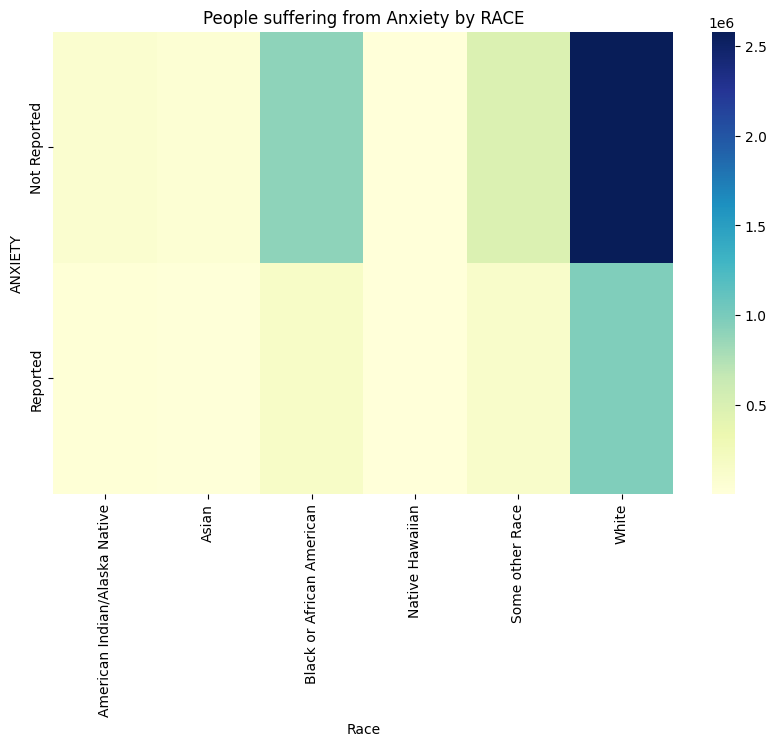

In [ ]:
#Plotting a heatmap to check mental illness among asians people by gender 

import seaborn as sns
import matplotlib.pyplot as plt

#Grouping Mental Illness based on Gender 
count_ani= df.groupby(['ANXIETYFLG','RACE']).size().reset_index(name = 'Count')

pivot_m = count_ani.pivot(index='ANXIETYFLG', columns='RACE', values='Count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_m, cmap='YlGnBu')

plt.title('People suffering from Anxiety by RACE')
plt.xlabel('Race')
plt.ylabel('ANXIETY')

plt.show()

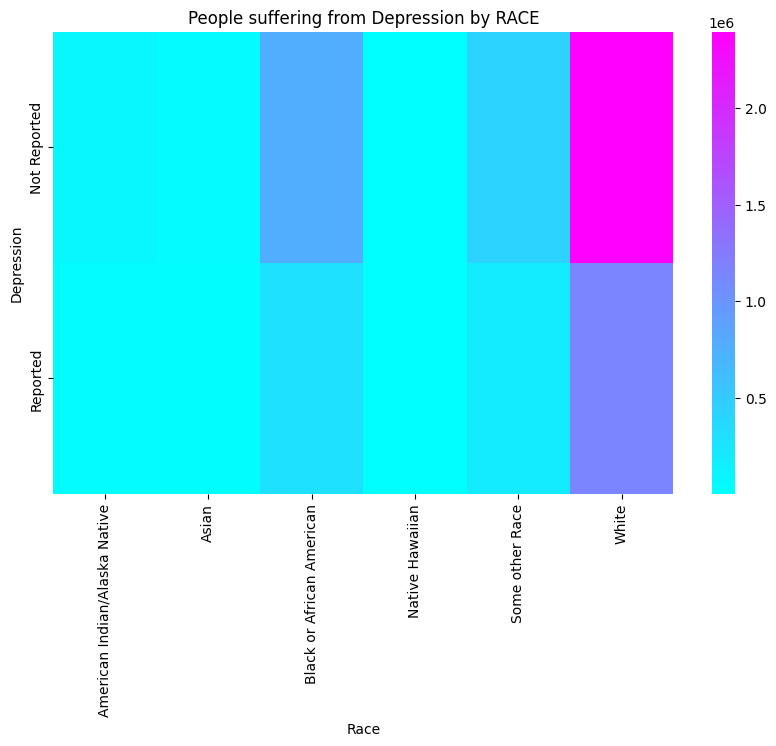

In [ ]:
#Plotting a heatmap to check mental illness among asians people by gender 

import seaborn as sns
import matplotlib.pyplot as plt

#Grouping Mental Illness based on Gender 
count_dep= df.groupby(['DEPRESSFLG','RACE']).size().reset_index(name = 'Count')

pivot_m = count_dep.pivot(index='DEPRESSFLG', columns='RACE', values='Count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_m, cmap='cool')

plt.title('People suffering from Depression by RACE')
plt.xlabel('Race')
plt.ylabel('Depression')

plt.show()

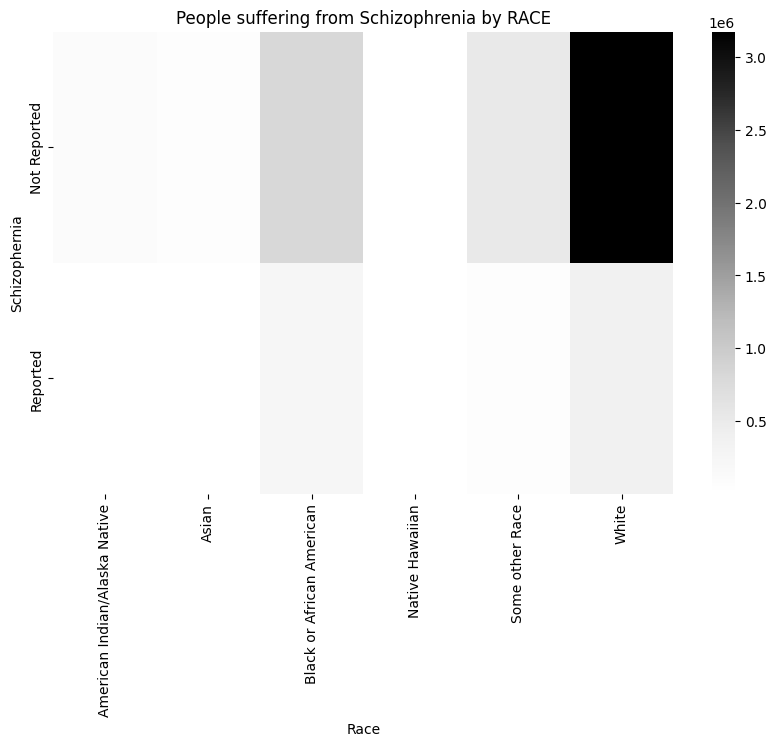

In [ ]:
#Plotting a heatmap to check mental illness among asians people by gender 

import seaborn as sns
import matplotlib.pyplot as plt

#Grouping Mental Illness based on Gender 
count_sch= df.groupby(['SCHIZOFLG','RACE']).size().reset_index(name = 'Count')

pivot_m = count_sch.pivot(index='SCHIZOFLG', columns='RACE', values='Count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_m, cmap='Greys')

plt.title('People suffering from Schizophrenia by RACE')
plt.xlabel('Race')
plt.ylabel('Schizophernia')

plt.show()

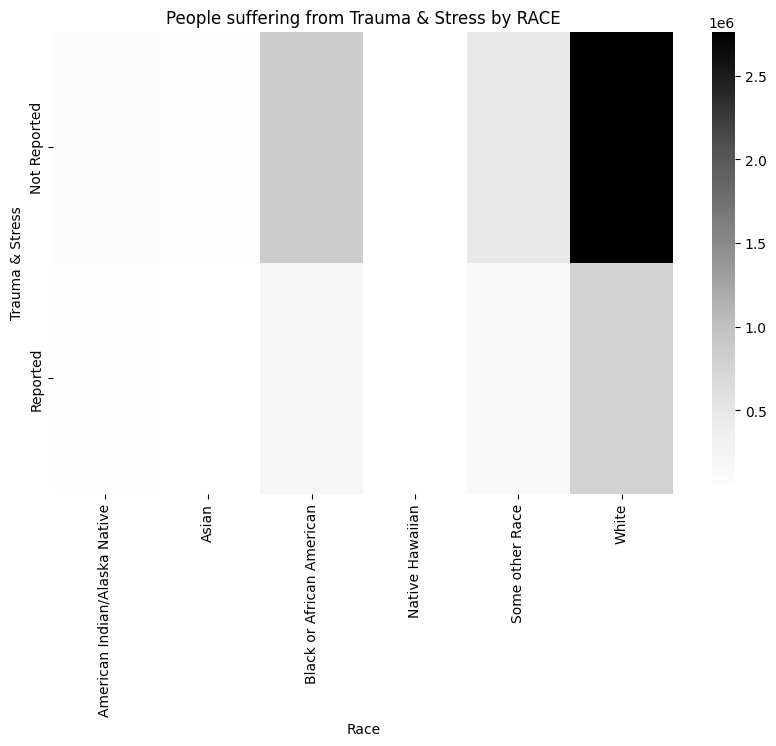

In [ ]:
#Plotting a heatmap to check mental illness among asians people by gender 

import seaborn as sns
import matplotlib.pyplot as plt

#Grouping Mental Illness based on Gender 
count_tra= df.groupby(['TRAUSTREFLG','RACE']).size().reset_index(name = 'Count')

pivot_m = count_tra.pivot(index='TRAUSTREFLG', columns='RACE', values='Count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_m, cmap='Greys')

plt.title('People suffering from Trauma & Stress by RACE')
plt.xlabel('Race')
plt.ylabel('Trauma & Stress')

plt.show()

# *Mentall Illness among people by gender *

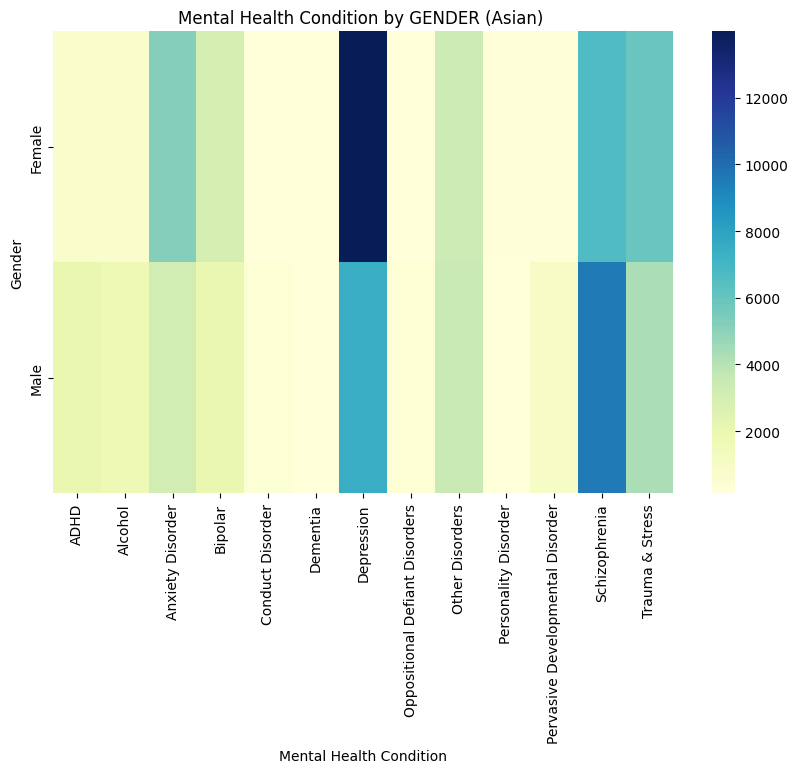

In [ ]:
#Plotting a heatmap to check mental illness among asians people by gender 

import seaborn as sns
import matplotlib.pyplot as plt

#Grouping Mental Illness based on Gender 
count_m= main.groupby(['GENDER','MH1']).size().reset_index(name = 'Count')

pivot_m = count_m.pivot(index='GENDER', columns='MH1', values='Count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_m, cmap='YlGnBu')

plt.title('Mental Health Condition by GENDER (Asian) ')
plt.xlabel('Mental Health Condition')
plt.ylabel('Gender')

plt.show()

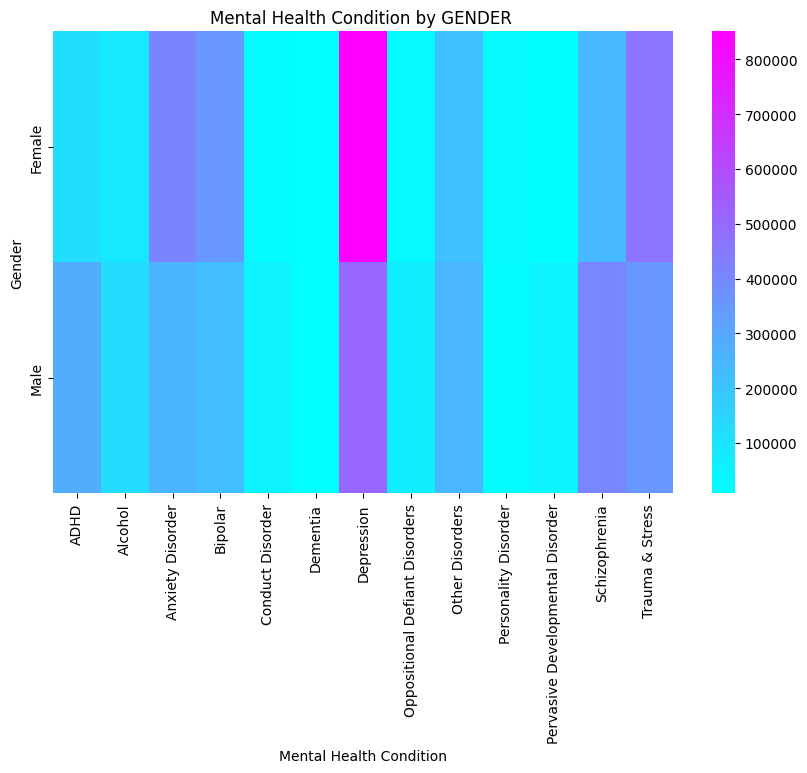

In [ ]:
#Plotting a heatmap to check mental illness among people by gender 

import seaborn as sns
import matplotlib.pyplot as plt

#Grouping Mentall Illness based on Gender among all Races
count_df= df.groupby(['GENDER','MH1']).size().reset_index(name = 'Count')

pivot_m = count_df.pivot(index='GENDER', columns='MH1', values='Count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_m, cmap='cool')

plt.title('Mental Health Condition by GENDER ')
plt.xlabel('Mental Health Condition')
plt.ylabel('Gender')

plt.show()

# *Mentall Illness Distribution in people by education level *

In [ ]:
import plotly.express as px

counts_educ = main.groupby(['GENDER','EDUC', 'MH1']).size().reset_index(name='count')
counts_educ = counts_educ[(counts_educ['EDUC'] != 'Missing/Unkown')]

fig = px.treemap(counts_educ, path=['GENDER', 'EDUC', 'MH1'], values='count')
fig.update_layout(title =  {'text':" Mental Illness Among different education level by gender in Asians",
        'font': {'size': 24}})
fig.show()

In [ ]:
import plotly.express as px

counts_educ1 = df.groupby(['GENDER','EDUC', 'MH1']).size().reset_index(name='count')
counts_educ1 = counts_educ1[(counts_educ1['EDUC'] != 'Missing/Unkown')]

fig = px.treemap(counts_educ1, path=['GENDER', 'EDUC', 'MH1'], values='count')
fig.update_layout(title =  {'text':" Mental Illness Among different education level by gender",
        'font': {'size': 24}})

fig.show()

In [ ]:
import plotly.express as px

# Count the number of occurrences of each combination of GENDER and MH1
counts = main.groupby(['GENDER', 'MH1']).size().reset_index(name='count')

fig = px.bar(counts, x="GENDER", y="count", color="MH1",
             pattern_shape="MH1", pattern_shape_sequence=[".", "x", "+", "/", "\\", "-" ] )
fig.update_layout(title =  {'text':" Mental Illness by gender in Asians",
        'font': {'size': 24}})
fig.show()

In [ ]:
import plotly.express as px

# Count the number of occurrences of each combination of GENDER and MH1
counts = df.groupby(['GENDER', 'MH1']).size().reset_index(name='count')

fig = px.bar(counts, x="GENDER", y="count", color="MH1",
             pattern_shape="MH1", pattern_shape_sequence=[".", "x", "+", "/", "\\", "-" ] )

fig.update_layout(title =  {'text':" Mental Illness by gender",
        'font': {'size': 24}})
fig.show()

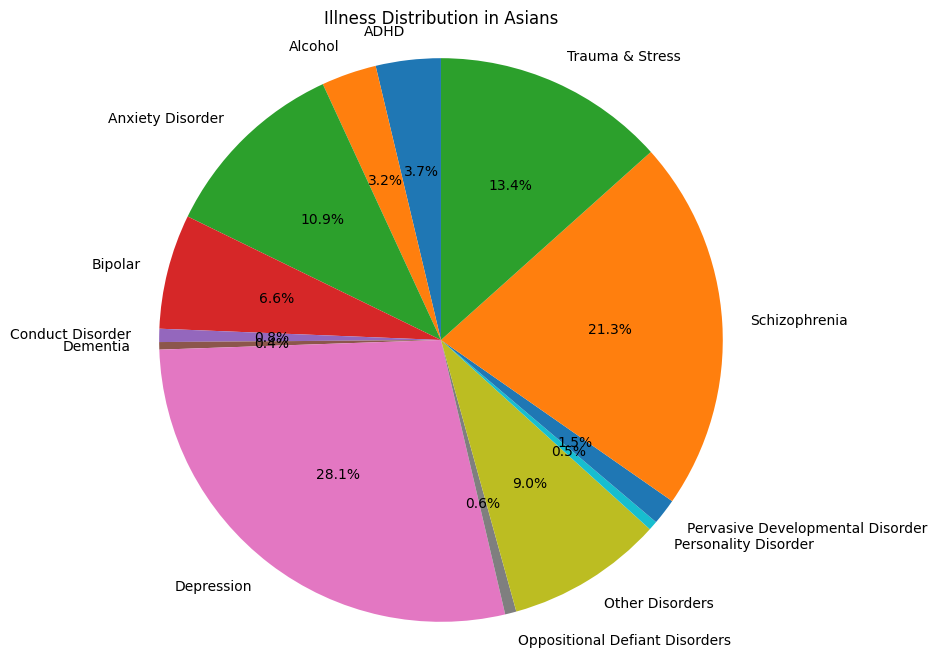

In [ ]:
count = main.groupby(['MH1']).size().reset_index(name = 'Count')
labels = count['MH1']
sizes = count['Count']
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Illness Distribution in Asians')
plt.show()

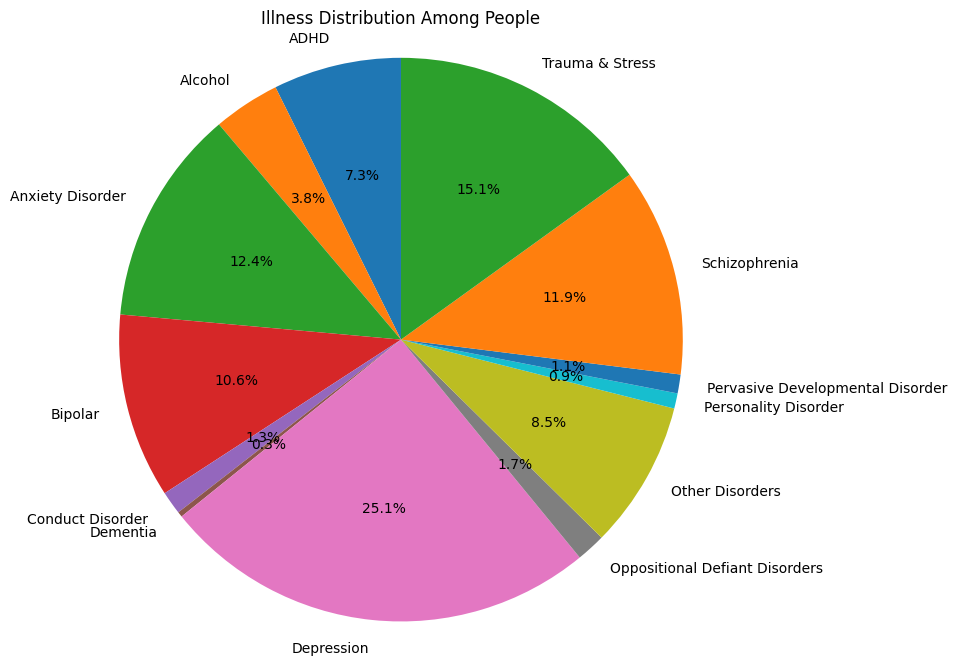

In [ ]:
count1 = df.groupby(['MH1']).size().reset_index(name = 'Count')
labels = count1['MH1']
sizes = count1['Count']
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Illness Distribution Among People')
plt.show()

In [ ]:
count_m= df.groupby(['GENDER','MH1']).size().reset_index(name = 'Count')

In [ ]:
count_race = df.groupby(['RACE', 'MH1']).size().reset_index(name = 'Count')

In [ ]:
count_state = df.groupby(['STATEFIP', 'MH1']).size().reset_index(name = 'Count')

In [ ]:
count_racecmp= df.groupby(['RACE','CMPSERVICE']).size().reset_index(name = 'Count')

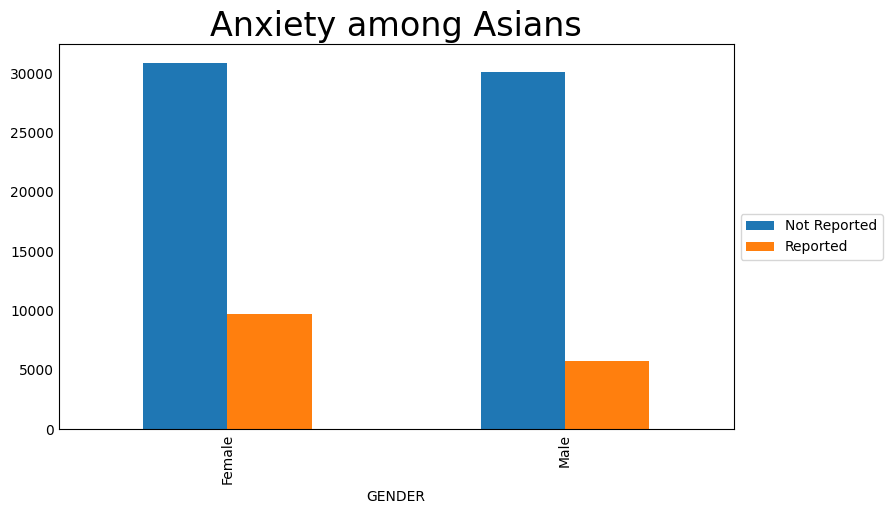

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



count_anxiety= main.groupby(['GENDER','ANXIETYFLG']).size().reset_index(name = 'Count')
pivot_m = count_anxiety.pivot(index='GENDER', columns='ANXIETYFLG', values='Count')


fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
ax.set_title("Anxiety among Asians", fontsize = 24)

plt.show()

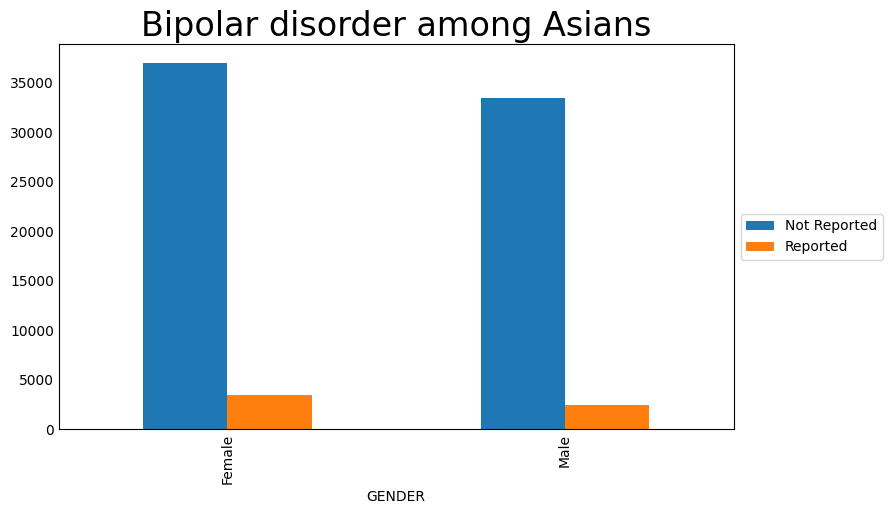

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


count_bipolar= main.groupby(['GENDER','BIPOLARFLG']).size().reset_index(name = 'Count')
pivot_m = count_bipolar.pivot(index='GENDER', columns='BIPOLARFLG', values='Count')


fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
ax.set_title("Bipolar disorder among Asians", fontsize = 24)


plt.show()

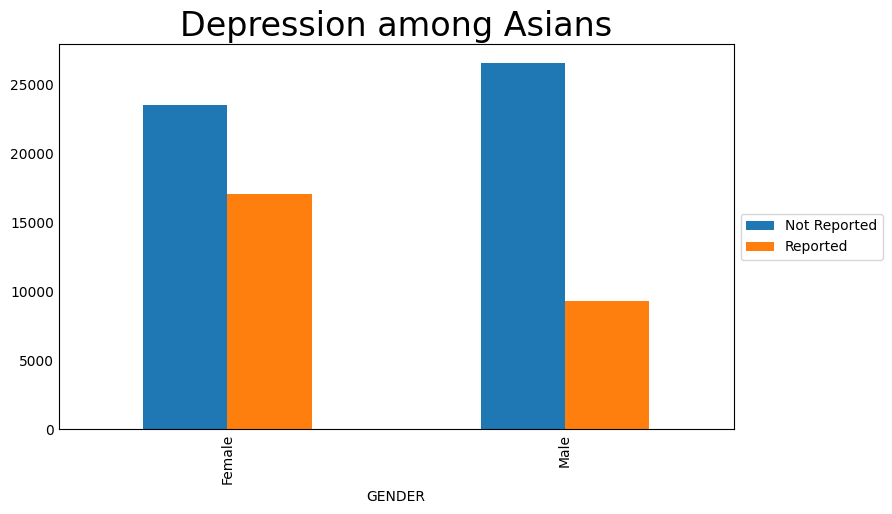

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


count_depress= main.groupby(['GENDER','DEPRESSFLG']).size().reset_index(name = 'Count')
pivot_m = count_depress.pivot(index='GENDER', columns='DEPRESSFLG', values='Count')
 

fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
ax.set_title("Depression among Asians", fontsize = 24)

plt.show()

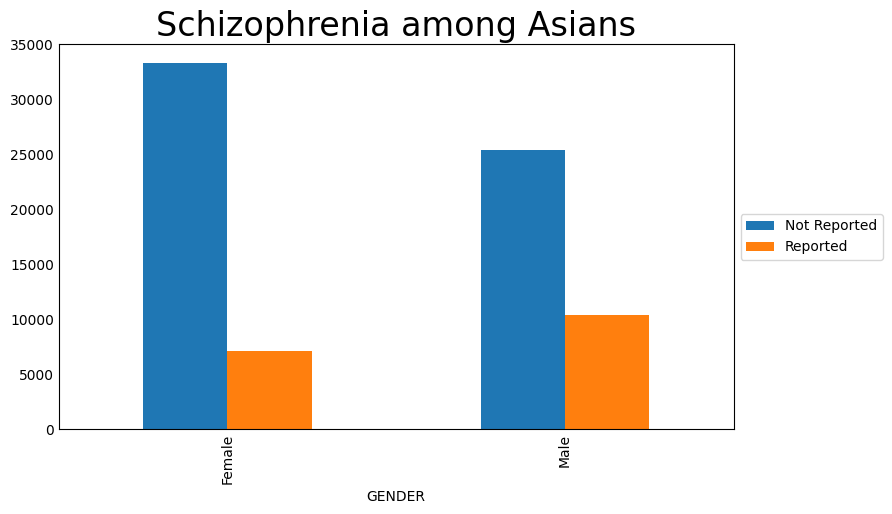

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

count_schizo= main.groupby(['GENDER','SCHIZOFLG']).size().reset_index(name = 'Count')
pivot_m = count_schizo.pivot(index='GENDER', columns='SCHIZOFLG', values='Count')

fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
ax.set_title("Schizophrenia among Asians", fontsize = 24)

plt.show()

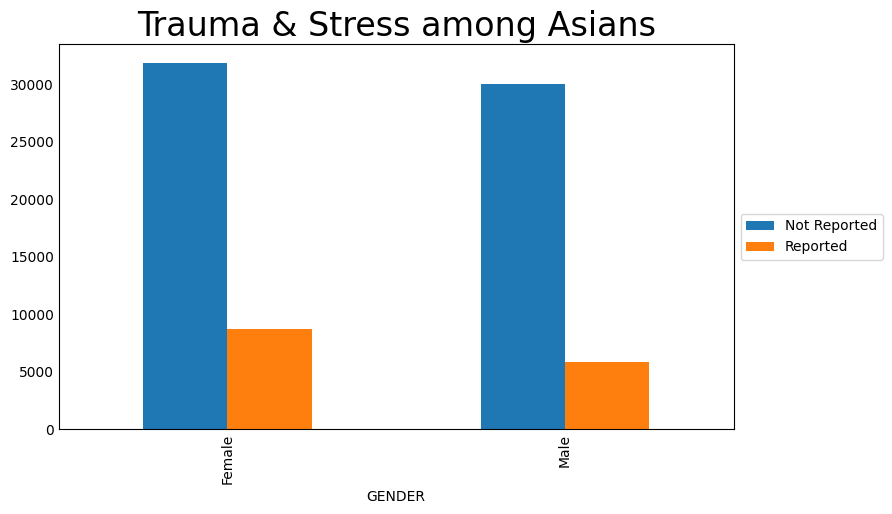

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


count_trauma= main.groupby(['GENDER','TRAUSTREFLG']).size().reset_index(name = 'Count')
pivot_m = count_trauma.pivot(index='GENDER', columns='TRAUSTREFLG', values='Count')



fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
ax.set_title("Trauma & Stress among Asians", fontsize = 24)

plt.show()

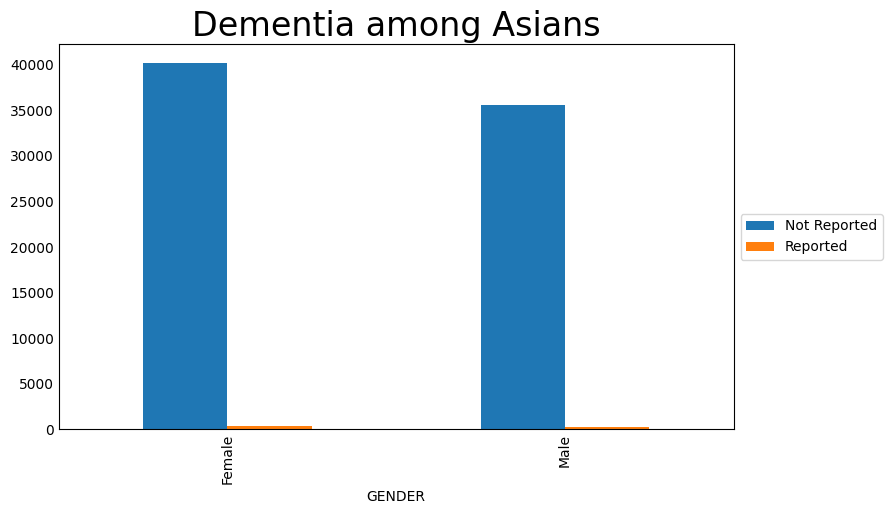

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

count_dementia= main.groupby(['GENDER','DELIRDEMFLG']).size().reset_index(name = 'Count')
pivot_m = count_dementia.pivot(index='GENDER', columns='DELIRDEMFLG', values='Count')


fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
ax.set_title("Dementia among Asians", fontsize = 24)

plt.show()

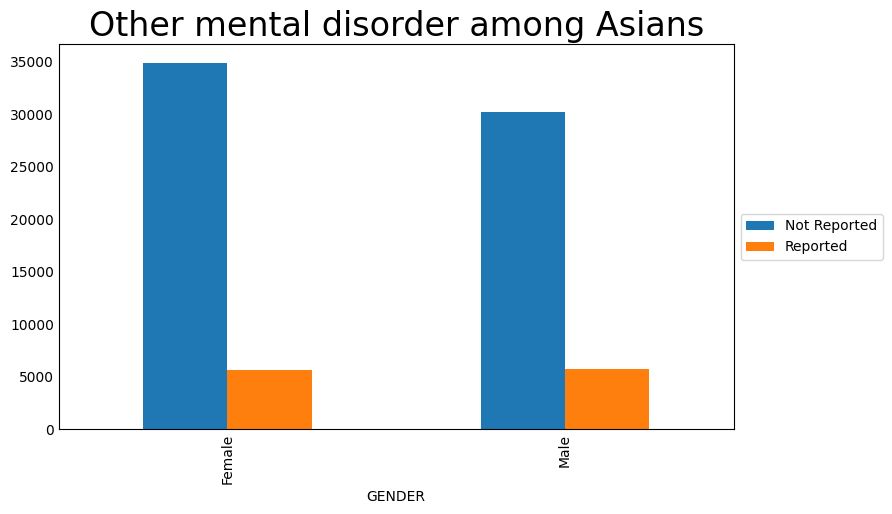

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

count_other= main.groupby(['GENDER','OTHERDISFLG']).size().reset_index(name = 'Count')
pivot_m = count_other.pivot(index='GENDER', columns='OTHERDISFLG', values='Count')


fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
ax.set_title("Other mental disorder among Asians", fontsize = 24)

plt.show()

In [ ]:
#Strip Charts
import plotly.express as px
fig = px.strip(count_racecmp, x="Count", y="RACE", orientation="h", color="CMPSERVICE")
fig.update_layout(title="Community Service Recieved distribution by Race")
fig.show()

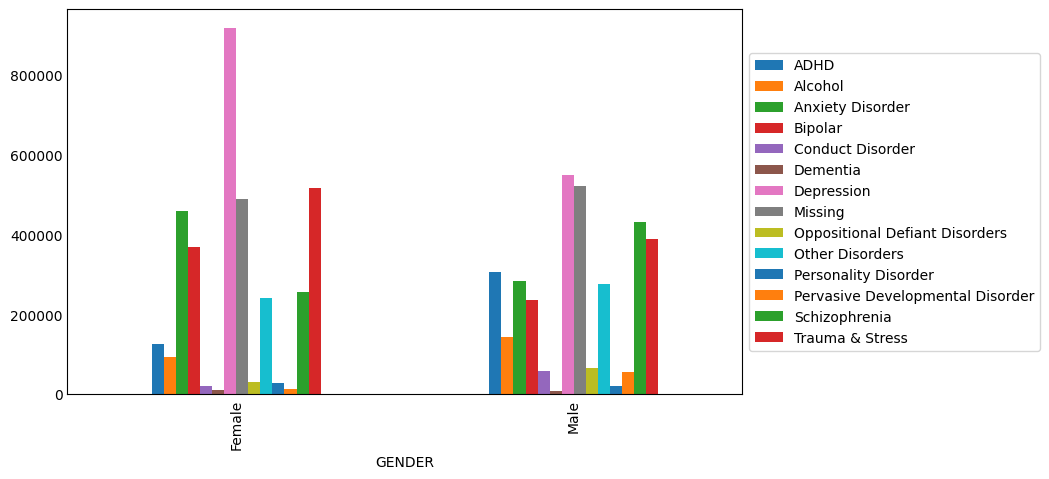

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pivot_m = count_m.pivot(index='GENDER', columns='MH1', values='Count')
#make one for asian 

fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)

plt.show()

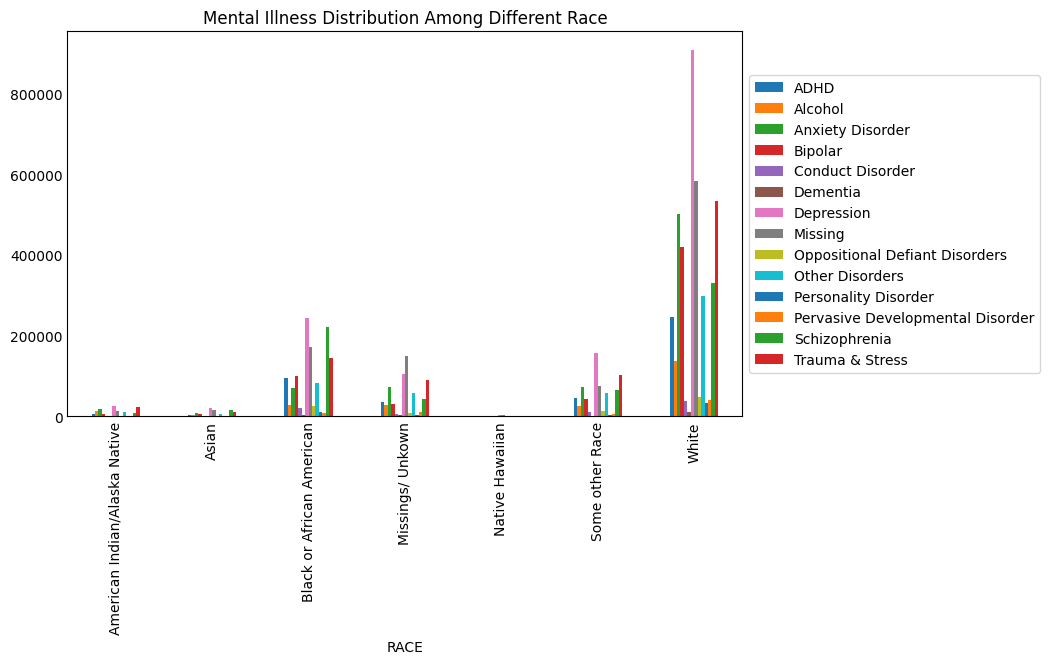

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pivot_m = count_race.pivot(index='RACE', columns='MH1', values='Count')


fig, ax = plt.subplots(figsize=(10, 5))

legend = pivot_m.plot(kind='bar', ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_ylabel('') # remove y-axis label for legend-only axis

ax.tick_params(axis='both', which='both', length=0)
ax.grid(False)

fig.subplots_adjust(right=0.8)
plt.title('Mental Illness Distribution Among Different Race')
plt.show()

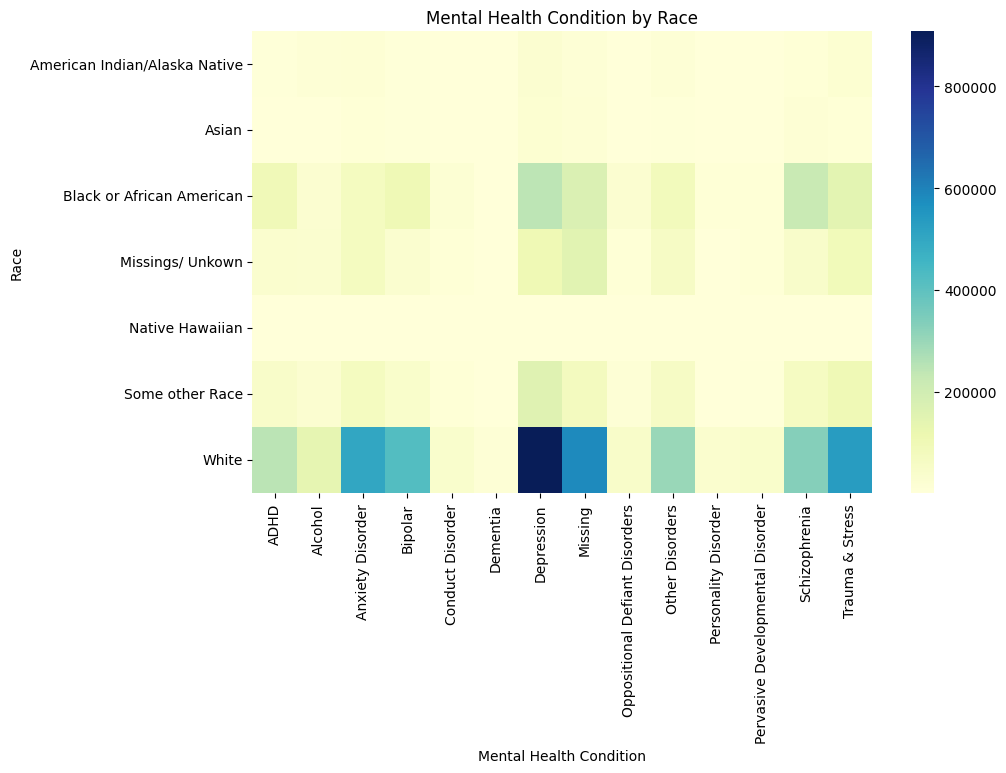

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_m = count_race.pivot(index='RACE', columns='MH1', values='Count')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_m, cmap='YlGnBu')

plt.title('Mental Health Condition by Race')
plt.xlabel('Mental Health Condition')
plt.ylabel('Race')

plt.show()


In [ ]:
from google.colab import files

files.download("final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>